In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [255]:
df_covid = pd.read_csv('../dataset/datacovid.csv')
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [256]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [257]:
#df_covid = pd.to_datetime(df_covid['DATE_DIED'])

In [258]:
print(f"Shape dataset Full:.........observations/rows: {df_covid.shape[0]} and columns: {df_covid.shape[1]}")

Shape dataset Full:.........observations/rows: 1048575 and columns: 21


In [259]:
df_covid.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [286]:
plt.style.use('ggplot')
from IPython.core.pylabtools import figsize
plt.figure(figsize=(12, 10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Distribution - Age')

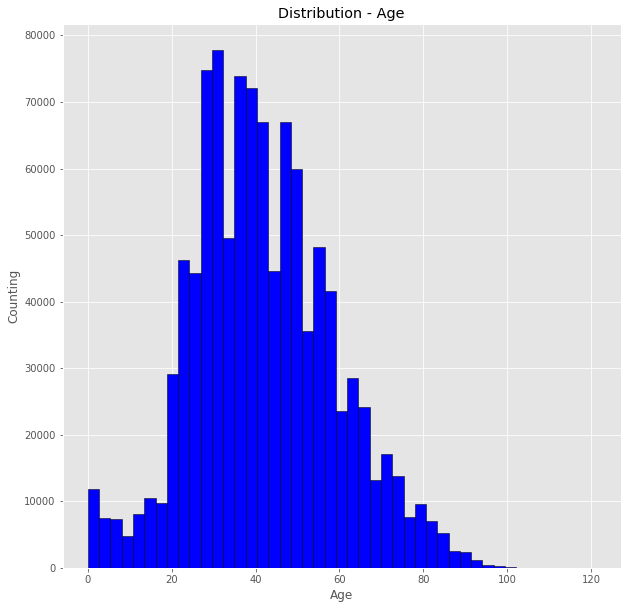

In [287]:
plt.hist(df_covid['AGE'], color='blue', edgecolor='black', bins=int(45/1))
plt.xlabel('Age')
plt.ylabel('Counting')
plt.title('Distribution - Age')

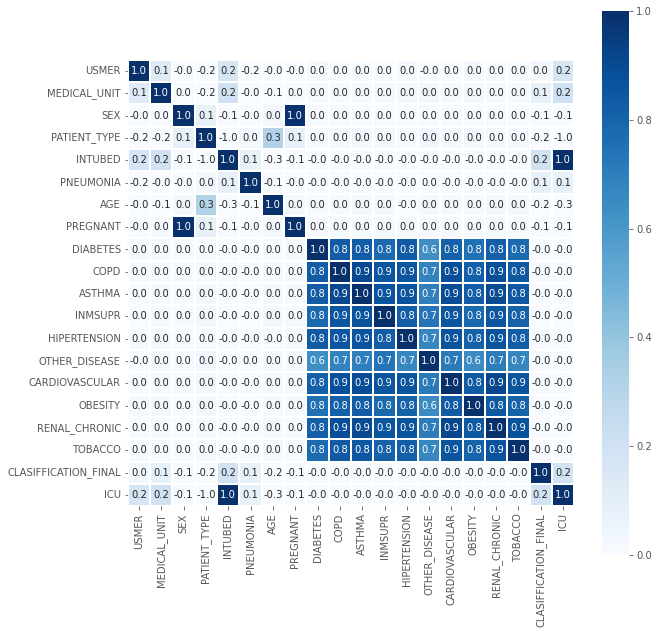

In [288]:
df_covid_corr = df_covid.corr()
ax1 = sns.heatmap(df_covid_corr, 
                  cbar=10, 
                  linewidths=2,
                  vmax=1,
                  vmin=0,
                  square=True,
                  cmap='Blues',
                  annot=True,
                  fmt=".1f")
plt.show()

In [263]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [264]:
df_covid.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


## Feature Engineering - Target: Die or Alive

In [265]:
# creating a new cloumn based on the column 'DATE_DIED'
# DATE is e.g. 15/02/2020 - True(Died), otherwise is False(Alive).
df_covid['alive_or_died'] = np.where(df_covid['DATE_DIED']!= '9999-99-99', 'Died', 'Alive')
df_covid['alive_or_died'].head()

0    Died
1    Died
2    Died
3    Died
4    Died
Name: alive_or_died, dtype: object

In [266]:
df_covid['alive_or_died'].value_counts(normalize=True).map('{:.2%}'.format)

Alive    92.66%
Died      7.34%
Name: alive_or_died, dtype: object

In [267]:
# change type for column of object to category
df_covid['alive_or_died'] = df_covid['alive_or_died'].astype('category')
df_covid.dtypes

USMER                      int64
MEDICAL_UNIT               int64
SEX                        int64
PATIENT_TYPE               int64
DATE_DIED                 object
INTUBED                    int64
PNEUMONIA                  int64
AGE                        int64
PREGNANT                   int64
DIABETES                   int64
COPD                       int64
ASTHMA                     int64
INMSUPR                    int64
HIPERTENSION               int64
OTHER_DISEASE              int64
CARDIOVASCULAR             int64
OBESITY                    int64
RENAL_CHRONIC              int64
TOBACCO                    int64
CLASIFFICATION_FINAL       int64
ICU                        int64
alive_or_died           category
dtype: object

In [268]:
df_covid = df_covid.drop(columns='DATE_DIED') # drop column - DATE_DIED
df_covid.dtypes

USMER                      int64
MEDICAL_UNIT               int64
SEX                        int64
PATIENT_TYPE               int64
INTUBED                    int64
PNEUMONIA                  int64
AGE                        int64
PREGNANT                   int64
DIABETES                   int64
COPD                       int64
ASTHMA                     int64
INMSUPR                    int64
HIPERTENSION               int64
OTHER_DISEASE              int64
CARDIOVASCULAR             int64
OBESITY                    int64
RENAL_CHRONIC              int64
TOBACCO                    int64
CLASIFFICATION_FINAL       int64
ICU                        int64
alive_or_died           category
dtype: object

In [269]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   USMER                 1048575 non-null  int64   
 1   MEDICAL_UNIT          1048575 non-null  int64   
 2   SEX                   1048575 non-null  int64   
 3   PATIENT_TYPE          1048575 non-null  int64   
 4   INTUBED               1048575 non-null  int64   
 5   PNEUMONIA             1048575 non-null  int64   
 6   AGE                   1048575 non-null  int64   
 7   PREGNANT              1048575 non-null  int64   
 8   DIABETES              1048575 non-null  int64   
 9   COPD                  1048575 non-null  int64   
 10  ASTHMA                1048575 non-null  int64   
 11  INMSUPR               1048575 non-null  int64   
 12  HIPERTENSION          1048575 non-null  int64   
 13  OTHER_DISEASE         1048575 non-null  int64   
 14  CARDIOVASCULAR    

<AxesSubplot:>

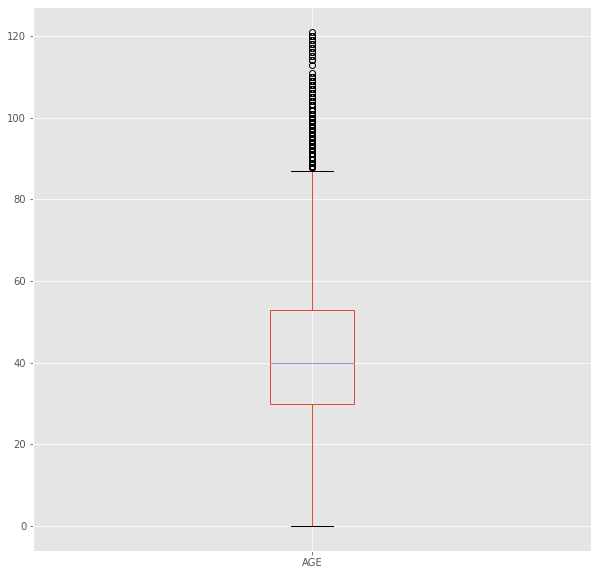

In [285]:
# box plot
df_covid.boxplot(column=["AGE"])

In [270]:
# counting the differents categories for each columns
df_covid.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
alive_or_died             2
dtype: int64

### Split the data into features and target

In [271]:
# Alternatively X and y can be obtained directly from the dataframe attribute:
X = df_covid.drop('alive_or_died', axis=1) # drop the column target
y = df_covid['alive_or_died'] # target

### Training and Validation

In [272]:
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [273]:
# model
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# fitting the model...
clf.fit(X_train, Y_train)

# prediction - target
predictions = clf.predict(X_validation)

In [274]:
# without feature selection or feature importance.
print(f'score:....................: {accuracy_score(Y_validation, predictions)}')

score:....................: 0.9478864172805951


In [282]:
## https://medium.com/analytics-vidhya/catboost-101-fb2fdc3398f3
from catboost import CatBoostClassifier, Pool

cat_model = CatBoostClassifier(
    iterations = 100, # 1000 are ideal
    loss_function='MultiClass',
    bootstrap_type = "Bayesian",
    eval_metric = 'MultiClass',
    leaf_estimation_iterations = 100,
    random_strength = 0.5,
    depth = 7,
    l2_leaf_reg = 5,
    learning_rate=0.1,
    bagging_temperature = 0.5
    #task_type = "GPU",
)

In [283]:
# training the model
cat_model.fit(X_train,Y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.4714171	total: 3.15s	remaining: 5m 12s
1:	learn: 0.3363978	total: 6.23s	remaining: 5m 5s
2:	learn: 0.2581002	total: 13.6s	remaining: 7m 18s
3:	learn: 0.2084951	total: 17s	remaining: 6m 48s
4:	learn: 0.1800558	total: 23.8s	remaining: 7m 32s
5:	learn: 0.1618456	total: 27.2s	remaining: 7m 6s
6:	learn: 0.1501036	total: 34.2s	remaining: 7m 34s
7:	learn: 0.1418871	total: 40.9s	remaining: 7m 50s
8:	learn: 0.1361168	total: 48.1s	remaining: 8m 6s
9:	learn: 0.1312905	total: 54.9s	remaining: 8m 13s
10:	learn: 0.1279533	total: 1m 2s	remaining: 8m 21s
11:	learn: 0.1254752	total: 1m 8s	remaining: 8m 24s
12:	learn: 0.1233955	total: 1m 11s	remaining: 7m 58s
13:	learn: 0.1218936	total: 1m 18s	remaining: 8m 1s
14:	learn: 0.1204857	total: 1m 24s	remaining: 7m 58s
15:	learn: 0.1193689	total: 1m 31s	remaining: 7m 59s
16:	learn: 0.1185291	total: 1m 37s	remaining: 7m 58s
17:	learn: 0.1177098	total: 1m 43s	remaining: 7m 49s
18:	learn: 0.1170997	total: 1m 49s	remaining: 7m 46s
19:	learn: 0.1164284	

In [284]:
# predicting the model output
y_pred_cat = cat_model.predict(X_validation)
# printing the accuracy of the tuned model
print("accuracy of the catboost: ",accuracy_score(Y_validation,y_pred_cat))

accuracy of the catboost:  0.9521588822926352
